# Naive Bayes Classifier - Gaussian Naive Bayes

# Bank Marketing Dataset Plus
- age	年龄
- job	职业：admin, unknown, unemployed, management…
- marital	婚姻：married, divorced, single
- default	信用卡是否有违约: yes or no
- housing	是否有房贷: yes or no
- contact	联系方式：unknown, telephone, cellular
- month	上一次联系的月份：jan, feb, mar, …
- day_of_week	上一次联系的星期几：mon, tue, wed, thu, fri
- duration	上一次联系的时长（秒）
- campaign	活动期间联系客户的次数
- pdays	上一次与客户联系后的间隔天数
- previous	在本次营销活动前，与客户联系的次数
- poutcome	之前营销活动的结果：unknown, other, failure, success
- emp_var_rate	就业变动率（季度指标）
- cons_price_index	消费者价格指数（月度指标）
- cons_conf_index	消费者信心指数（月度指标）
- lending_rate3m	银行同业拆借率 3个月利率（每日指标）
- nr_employed	雇员人数（季度指标）
- subscribe	客户是否进行购买：yes 或 no

In [1]:
# Import libararies for data management
import numpy as np
import pandas as pd


In [2]:
# Load dataset
data = pd.read_csv('../data/processed_train_filled.csv')

In [3]:
data = data.drop(['emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed'], axis=1)

# Data Pre-processing

In [4]:
numeric_X = data[['age','duration','campaign','pdays','previous']]
category_X_y = data[['job', 'marital', 'education', 'housing', 'loan', 'default', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribe']]

from sklearn import preprocessing
norm_X = numeric_X.apply(preprocessing.scale, axis=0)
data = pd.concat([norm_X, category_X_y], axis=1)

In [5]:
datanew = pd.get_dummies(data, columns=['job', 'marital', 'education', 'housing', 'loan', 'default', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribe'])

In [6]:
# define features 
features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'default_no', 'default_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']
X = datanew[features]

In [7]:
#users profile only as X2
features2 = ['age', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'default_no', 'default_yes', 'contact_cellular',
       'contact_telephone']
X2 = datanew[features2]

In [8]:
#previous campaign details only as X3
features3 = ['contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']
X3 = datanew[features3]

In [9]:
# define target
y = datanew['subscribe_yes']

In [10]:
y.value_counts()

subscribe_yes
False    19548
True      2952
Name: count, dtype: int64

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict

In [12]:
# define a Gaussian bayes classifier
# alpha:smoothing parameter, by default=1.0
GNB = GaussianNB()
GNB.fit(X, y)

GaussianNB()

In [13]:
#predict target based on cross validation
y_pred_cv = cross_val_predict(GNB,X,y,cv=10)

In [14]:
Accuracy = cross_val_score(GNB,X,y,cv=10).mean()

In [15]:
#prediction based on user profiles 
y2_pred_cv = cross_val_predict(GNB,X2,y,cv=10)

In [16]:
Accuracy2 = cross_val_score(GNB,X2,y,cv=10).mean()

In [17]:
#prediction based on previous campaign info
y3_pred_cv = cross_val_predict(GNB,X3,y,cv=10)

In [18]:
Accuracy3 = cross_val_score(GNB,X3,y,cv=10).mean()

In [19]:
# 使用isotonic和sigmoid两种校准方式提高GaussianNB的预测准确率
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

In [20]:
GNB_isotonic = CalibratedClassifierCV(GNB, cv=10, method='isotonic')
GNB_sigmoid = CalibratedClassifierCV(GNB, cv=10, method='sigmoid')

In [21]:
GNB_list = [
(GNB, 'Naive Bayes'),
(GNB_isotonic, 'Naive Bayes + Isotonic'),
(GNB_sigmoid, 'Naive Bayes + Sigmoid'),
]

In [22]:
y_pred2_cv = cross_val_predict(GNB_isotonic,X,y,cv=10)

In [23]:
Accuracy1_2 = cross_val_score(GNB_isotonic,X,y,cv=10).mean()

In [24]:
y2_pred2_cv = cross_val_predict(GNB_isotonic,X2,y,cv=10)

In [25]:
Accuracy2_2 = cross_val_score(GNB_isotonic,X2,y,cv=10).mean()

In [26]:
y3_pred2_cv = cross_val_predict(GNB_isotonic,X3,y,cv=10)

In [27]:
Accuracy3_2 = cross_val_score(GNB_isotonic,X3,y,cv=10).mean()

In [28]:
y_pred3_cv = cross_val_predict(GNB_sigmoid,X,y,cv=10)

In [29]:
Accuracy1_3 = cross_val_score(GNB_sigmoid,X,y,cv=10).mean()

In [30]:
y2_pred3_cv = cross_val_predict(GNB_sigmoid,X2,y,cv=10)

In [31]:
Accuracy2_3 = cross_val_score(GNB_sigmoid,X2,y,cv=10).mean()

In [32]:
y3_pred3_cv = cross_val_predict(GNB_sigmoid,X3,y,cv=10)

In [33]:
Accuracy3_3 = cross_val_score(GNB_sigmoid,X3,y,cv=10).mean()

# ROC Curve & Calibration Curve

In [34]:
# probablities for each prediction
proba_y = cross_val_predict(GNB, X, y, cv=10, method='predict_proba')

In [35]:
# get the column of probabilities being 1
proba_y_1 = proba_y[:,1]

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
# get fpr, tpr and thresholds

fpr, tpr, thresholds = metrics.roc_curve(y, proba_y_1, pos_label=1)

In [37]:
# plot roc curve
import matplotlib as mpl
import matplotlib.pyplot as plt

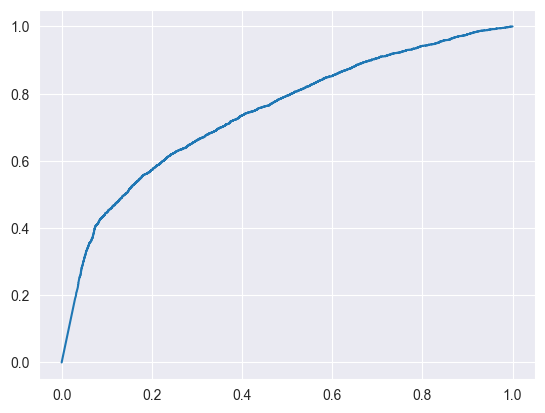

In [38]:
plt.plot(fpr,tpr)
plt.show()

In [39]:
# auc (area under ROC curve)
metrics.auc(fpr, tpr)

0.7447471389999352

In [40]:
# Calibration Curve概率校准曲线绘制
from sklearn.calibration import calibration_curve

In [41]:
fraction_of_positives, mean_predicted_value = calibration_curve(y, proba_y_1, n_bins=10)

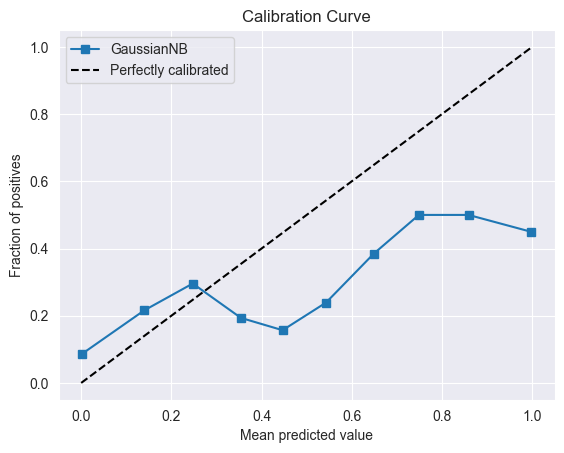

In [42]:
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="GaussianNB")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title('Calibration Curve')
plt.legend()
plt.show()

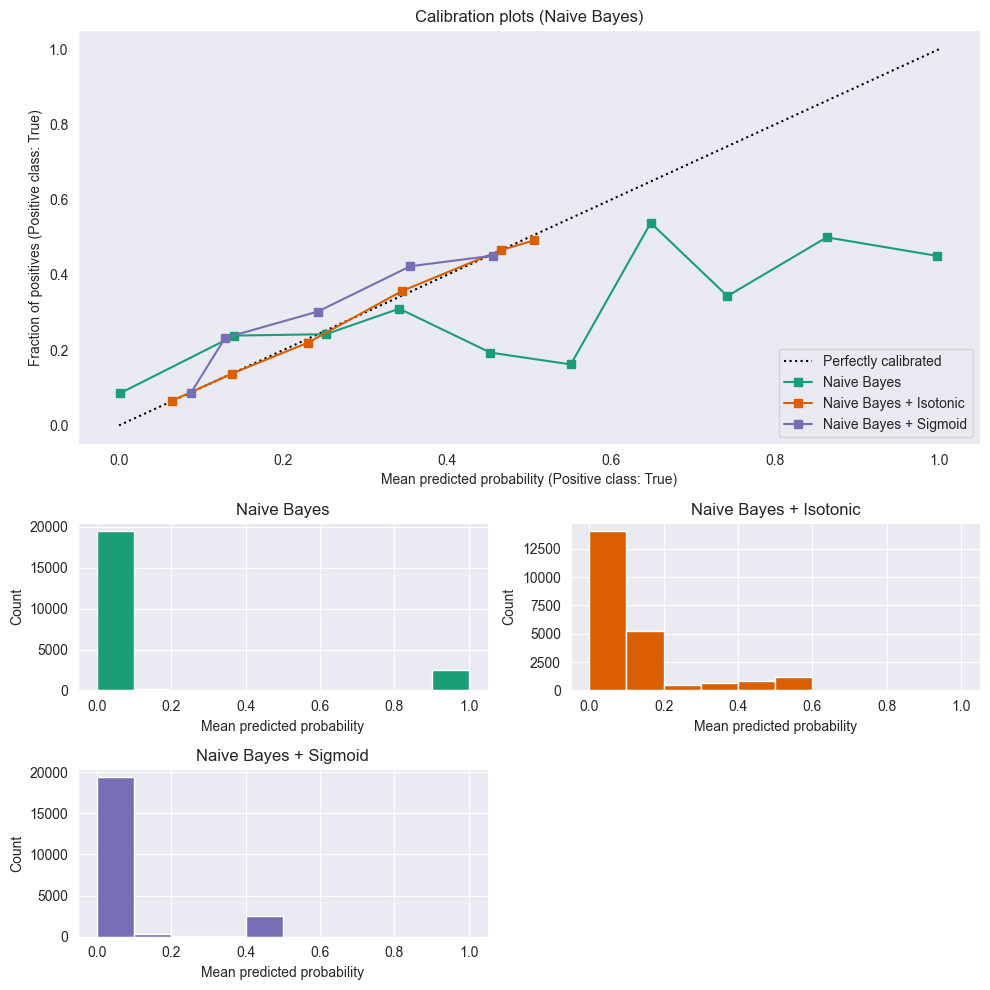

In [43]:
# 加入isotonic和sigmoid绘制曲线
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,10))
gs = GridSpec(4,2)
colors = plt.get_cmap('Dark2')

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (gnb, name) in enumerate(GNB_list):
    gnb.fit(X, y)
    display = CalibrationDisplay.from_estimator(
        gnb, 
        X, 
        y, 
        n_bins=10, 
        name=name, 
        ax=ax_calibration_curve, 
        color=colors(i)
    )
    calibration_displays[name] = display
    
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

#Add histogram
grid_positions = [(2,0), (2,1), (3,0)]
for i, (_, name) in enumerate(GNB_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])
    
    ax.hist(
        calibration_displays[name].y_prob,
        range=(0,1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel='Mean predicted probability', ylabel='Count')
    
plt.tight_layout()
plt.show()

In [46]:
from collections import defaultdict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    brier_score_loss,
    f1_score,
    log_loss,
    precision_score,
    recall_score,
    roc_auc_score,
)

scores = defaultdict(list)
for i, (gnb, name) in enumerate(GNB_list):
    gnb.fit(X, y)
    y_prob = gnb.predict_proba(X)
    y_pred = gnb.predict(X)
    scores["Classifier"].append(name)

    for metric in [brier_score_loss, log_loss, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y, y_prob[:, 1]))

    for metric in [precision_score, recall_score, f1_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y, y_pred))

    score_df = pd.DataFrame(scores).set_index("Classifier")
    score_df.round(decimals=3)

    print(confusion_matrix(y, y_pred))

score_df

[[18067  1481]
 [ 1752  1200]]
[[18950   598]
 [ 2373   579]]
[[19548     0]
 [ 2952     0]]


C:\Users\CA.CA-PC\IdeaProjects\JAPJC_Export\MM5425\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Brier loss,Log loss,Roc auc,Precision,Recall,F1
Classifier,,,,,,
Naive Bayes,0.140502,2.285872,0.747655,0.447594,0.406504,0.426061
Naive Bayes + Isotonic,0.098313,0.334300,0.748716,0.491929,0.196138,0.280455
Naive Bayes + Sigmoid,0.100195,0.343904,0.747587,0.000000,0.000000,0.000000
